# **1. KMeans**


### **Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±**
- Î®ºÏ†Ä, Íµ∞ÏßëÌôîÎ•º ÏúÑÌïú toy Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≤†ÏäµÎãàÎã§.  
(Ï£ºÏÑùÏùÑ Îã¨ÏïÑÎëêÍ∏¥ ÌñàÎã§Îßå, Îã§Î≥ÄÎüâ Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞úÎÖêÏù¥ Îì§Ïñ¥Í∞Ä Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†§Ïö∏ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.  
Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±ÏùÑ ÏúÑÌïú Í≥ºÏ†ïÏù¥Îùº, Ïù¥Ìï¥ ÏïàÎêòÏãúÎ©¥ ÎÑòÍ∏∞ÏÖîÎèÑ Îê©ÎãàÎã§.)


ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÏãúÏºú Ï£ºÏÑ∏Ïöî.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import multivariate_normal # Îã§Î≥ÄÎüâ Ï†ïÍ∑ú Î∂ÑÌè¨

np.random.seed(4242) # random seed

In [2]:
### ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï

# colormap
colors = sns.color_palette("husl",8)
col = [colors[0],colors[1],colors[3],colors[5],colors[7]]
cols = ['b','g','r']

In [3]:
### Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï
# 3Í∞úÏùò Îã§Î≥ÄÎüâ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∞ÄÏ†ï ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

pi_true = np.array([0.2,0.5,0.3]) # Í∞Å clusterÏóê ÏÜçÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®(2:5:3)
mu_true = np.array([[2,2],[-1,-1],[0,-1.4]]) # Í∞Å clusterÏùò ÌèâÍ∑†(center)

# Í∞Å clusterÏùò var-covariance matrix
# Î∂ÑÏÇ∞ Ï†ïÎèÑÎ°ú ÏÉùÍ∞ÅÌïòÏãúÎ©¥ Îê©ÎãàÎã§.
sigma_true = np.zeros((3,2,2))
sigma_true[0] = np.array([[1.,0.3],[0.2,0.2]])
sigma_true[1] = np.array([[0.5,0.8],[0.8,0.5]])
sigma_true[2] = np.array([[1.3,0.3],[0.2,0.4]])

In [4]:
### Toy Dataset ÏÉùÏÑ±

N = 100 # Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
data = np.zeros((N,3)) # Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•ÏùÑ ÏúÑÌïú Î∞∞Ïó¥ÏùÑ Ï¥àÍ∏∞Ìôî

## Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
for i in range(N):
    z = np.random.random() # 0 ~ 1Ïùò ÎÇúÏàò ÏÉùÏÑ±
    idx = 0 # cluster
    interval = 0 # Íµ¨Í∞Ñ

    for j in range(len(pi_true)):
        # ÌòÑÏû¨ ÏÉùÏÑ±Ìïú ÎÇúÏàò Í∞íÏù¥ ÏÜçÌïòÎäî clusterÎ•º Ïù∏Îç±Ïä§Î°ú ÏßÄÏ†ï
        if z >= interval and z <= interval+pi_true[j]:
            idx = j
            break
        else:
            interval += pi_true[j] # Îã§Ïùå ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Íµ¨Í∞ÑÏúºÎ°ú Ïù¥Îèô

    # Îã§Î≥ÄÎüâ Ï†ïÍ∑ú Î∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ
    x, y = np.random.multivariate_normal(mu_true[idx],sigma_true[idx])
    data[i] = (x,y,idx) # Îç∞Ïù¥ÌÑ∞ Î∞∞Ïó¥Ïóê Ï∂îÍ∞Ä

/var/folders/r0/22gf1ts16tz5tvsv6761tkr40000gn/T/ipykernel_27669/474639029.py:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x, y = np.random.multivariate_normal(mu_true[idx],sigma_true[idx])


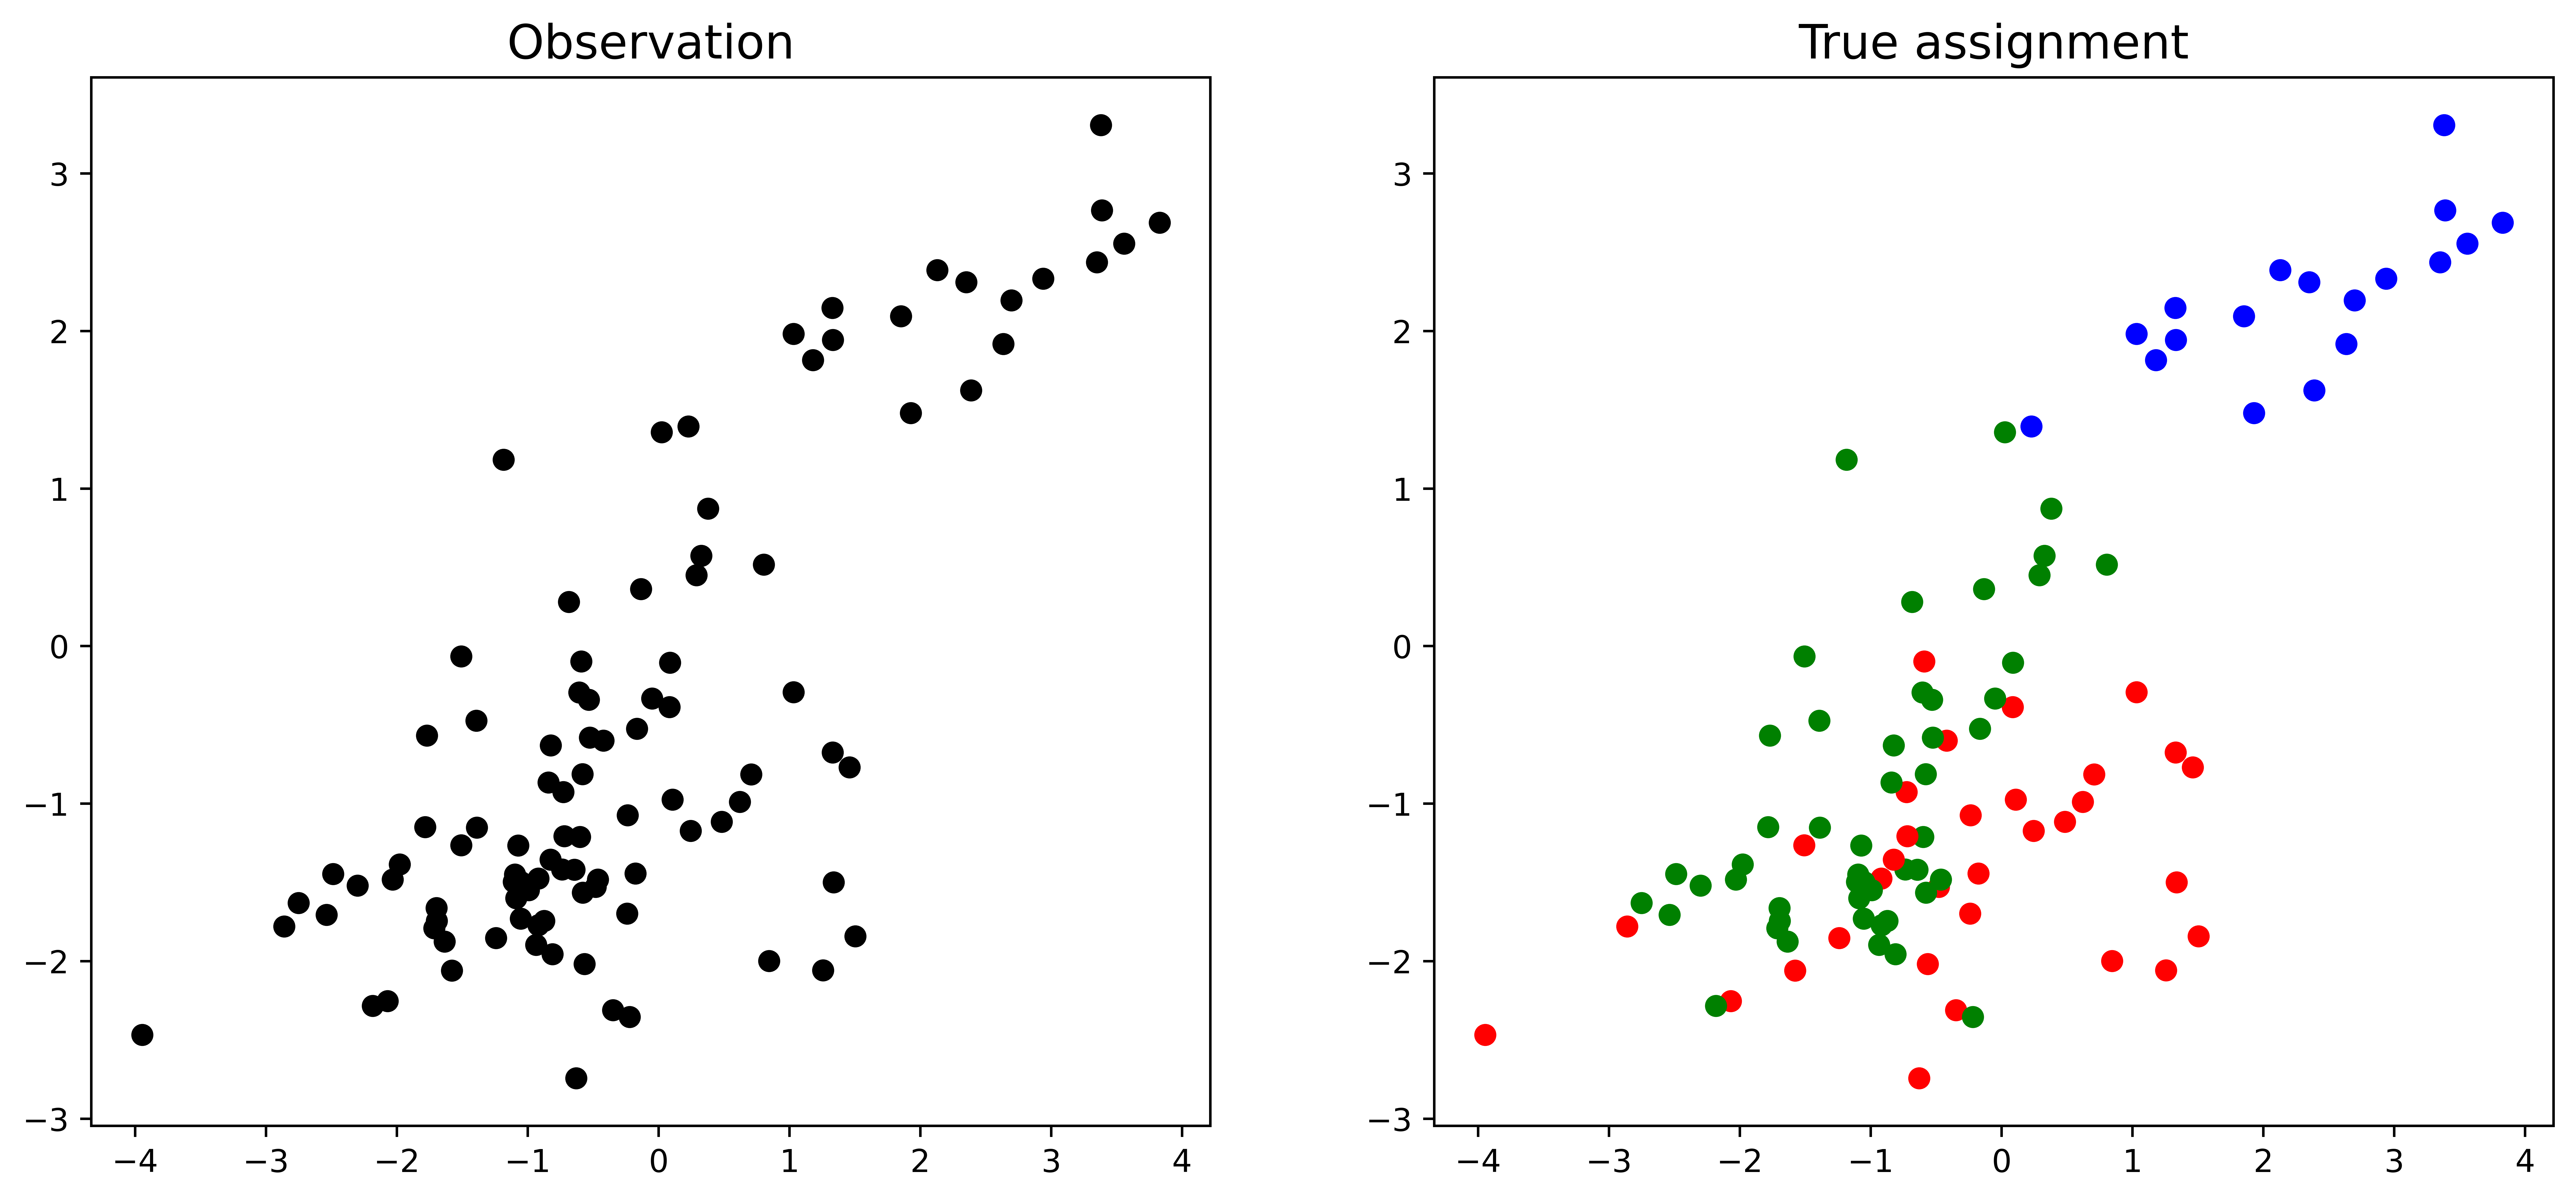

In [5]:
### ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

plt.figure(1,figsize = (14,6), dpi = 900)

## Observation(ÌïôÏäµÏóê ÏÇ¨Ïö©Îê† data point)
# Î∂ÑÌè¨ Î™®Î¶Ñ, Ïñ¥ÎîîÏÑú ÏôîÎäîÏßÄÎèÑ Î™®Î¶Ñ
# Ï¶â, clustering ÏãúÏóêÎäî ÎùºÎ≤® Ï†ïÎ≥¥Í∞Ä ÏóÜÏùå
plt.subplot(121)
plt.title('Observation',fontsize = 15)
plt.plot(data[:,0],data[:,1],'ko')

## True Assignment(Ï†ïÎãµ)
# label Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îê®
# ÏúÑÏóêÏÑú Îã§Î≥ÄÎüâ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∞ÄÏ†ïÌïòÏòÄÍ∏∞Ïóê, Í∞Å pointÍ∞Ä ÏÜçÌïòÎäî cluster Ï†ïÎ≥¥Î•º ÌååÏïÖÌï† Ïàò ÏûàÏùå
plt.subplot(122)
plt.title('True assignment',fontsize = 15)
for i in range(N):
    plt.plot(data[i,0],data[i,1],'o',c=cols[int(data[i,2])])

plt.show()

- ÌïôÏäµ ÏãúÏóêÎäî clusterÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä ÏóÜÏäµÎãàÎã§.
  - Ï¶â, Îç∞Ïù¥ÌÑ∞ pointÏóê ÎåÄÌïú Íµ¨Î∂Ñ ÏóÜÏù¥ Î™®Îì† Ï†êÏù¥ ÍπåÎßåÏÉâÏúºÎ°ú Ï∑®Í∏âÎêòÎäî Í≤ÉÏûÖÎãàÎã§.
- Ïù¥ÌõÑ Íµ∞ÏßëÌôîÎ•º ÌÜµÌï¥ data pointÎ•º 3Í∞úÏùò cluster(ÌååÎûÄÏÉâ, Ï¥àÎ°ùÏÉâ, Îπ®Í∞ÑÏÉâ)Î°ú ÎÇòÎàÑÍ≥†Ïûê ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

In [6]:
### Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X = data[:, :2]
y = data[:, 2]

### Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í∞ÄÍ≥µ
toyDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
toyDF['target'] = y
toyDF.head()

ftr1      ftr2  target
0 -2.032063 -1.481299     1.0
1  0.803146  0.517739     1.0
2 -2.861891 -1.779394     2.0
3  3.348950  2.436819     0.0
4  1.851749  2.093774     0.0

## **1-1. Îã§Ïùå Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî KMeans Í∞ùÏ≤¥Î•º ÎßåÎì§Ïñ¥ Ï£ºÏÑ∏Ïöî.**
- Íµ∞ÏßëÌôî Í∞úÏàò: 3
- Ï¥àÍ∏∞Ïóê Íµ∞Ïßë Ï§ëÏã¨Ï†êÏùò Ï¢åÌëúÎ•º ÏÑ§Ï†ïÌï† Î∞©Ïãù: `k-menas++`
- ÏµúÎåÄ Î∞òÎ≥µ ÌöüÏàò: 50

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=50, random_state=0) ###ÎπàÏπ∏###
cluster_labels = kmeans.fit_predict(X)
toyDF['cluster'] = cluster_labels
print(toyDF.groupby('target')['cluster'].value_counts())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


target  cluster
0.0     1          17
        2           1
1.0     0          34
        2          16
2.0     2          17
        0          15
Name: count, dtype: int64


## **1-2. ÏïÑÎûò Î¨∏Ï†úÏùò ÏΩîÎìúÎ•º ÏôÑÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.**
- Î®ºÏ†Ä, Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ïùò Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò Ïã§Î£®Ïó£ Í≥ÑÏàò Í∞íÏùÑ Íµ¨ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.
- Ïù¥ÌõÑ, Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Ïã§Î£®Ïó£ Í≥ÑÏàò Í∞íÏùÑ Íµ¨ÌïòÎäî ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÏÑ∏Ïöî.

ÏïÑÎûò ÏΩîÎìúÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõå Ï£ºÏÑ∏Ïöî.

In [10]:
# Ïã§Î£®Ïó£ Î∂ÑÏÑù metric Í∞íÏùÑ Íµ¨ÌïòÍ∏∞ ÏúÑÌïú API Ï∂îÍ∞Ä
from sklearn.metrics import silhouette_samples, silhouette_score

# Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞íÏùÑ Íµ¨Ìï®.
score_samples = silhouette_samples(toyDF[['ftr1', 'ftr2']], toyDF['cluster']) ###ÎπàÏπ∏###
print('silhouette_samples( ) return Í∞íÏùò shape' , score_samples.shape)

clusterDF = toyDF.copy()
# clusterDFÏóê Ïã§Î£®Ïó£ Í≥ÑÏàò Ïª¨Îüº Ï∂îÍ∞Ä
clusterDF['silhouette_coeff'] = score_samples

# Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞íÏùÑ Íµ¨Ìï®.
average_score = silhouette_score(toyDF[['ftr1', 'ftr2']], toyDF['cluster'])  ###ÎπàÏπ∏###
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

silhouette_samples( ) return Í∞íÏùò shape (100,)
Silhouette Analysis Score:0.446


# **2. ÌèâÍ∑† Ïù¥Îèô(Mean Shift)**

## **2-1. Îã§Ïùå Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎèÑÎ°ù ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.**
- Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
  - `make_blobs()`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  - Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ïãú ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
    - `n_samples` = 200
    - `n_features` = 2
    - `centers` = 3
    - `cluster_std` = 0.7
    - `random_state` = 0

- MeanShift ÌÅ¥ÎûòÏä§Ïùò Í∞ÄÏû• Ï§ëÏöîÌïú Ï¥àÍ∏∞Ìôî ÌååÎùºÎØ∏ÌÑ∞Î°ú, KDEÏùò ÎåÄÏó≠Ìè≠ hÏôÄ ÎèôÏùºÌïú Ïù¥ ÌååÎùºÎØ∏ÌÑ∞Îäî 1Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.

In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0) ###ÎπàÏπ∏###

# Íµ∞ÏßëÌôî
meanshift = MeanShift(bandwidth=1) ###ÎπàÏπ∏###
cluster_labels = meanshift.fit_predict(X)
print('cluster labels Ïú†Ìòï:', np.unique(cluster_labels))

cluster labels Ïú†Ìòï: [0 1 2]


## **2-2. ÏµúÏ†Å bandwidth Í∞íÏùÑ Ï∞æÏïÑÏ£ºÏÑ∏Ïöî.**

In [12]:
from sklearn.cluster import MeanShift, estimate_bandwidth ###ÎπàÏπ∏###

best_bandwidth = estimate_bandwidth(X) ###ÎπàÏπ∏###
print('bandwidth Í∞í:', round(best_bandwidth,3))

bandwidth Í∞í: 1.816


- ÏµúÏ†ÅÌôî Îêú bandwidth Í∞í Ï†ÅÏö©

In [14]:
clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

meanshift = MeanShift(bandwidth = best_bandwidth) ###ÎπàÏπ∏###
cluster_labels = meanshift.fit_predict(X)
print('cluster labels Ïú†Ìòï:',np.unique(cluster_labels))

cluster labels Ïú†Ìòï: [0 1 2]


## **2-3. ÏúÑÏóêÏÑú Íµ∞ÏßëÌôî Îêú Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.**
- Îã§Ïùå ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

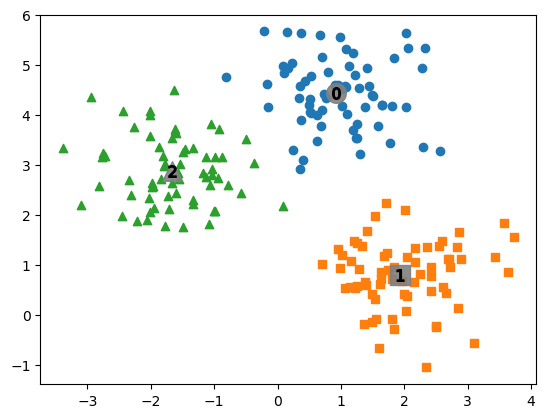

In [15]:
clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_ ###ÎπàÏπ∏###
unique_labels = np.unique(cluster_labels) ###ÎπàÏπ∏###
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]

    # Íµ∞ÏßëÎ≥ÑÎ°ú Îã§Î•∏ ÎßàÏª§Î°ú ÏÇ∞Ï†êÎèÑ Ï†ÅÏö©
    ###ÎπàÏπ∏###
    plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'], marker=markers[label])

    # Íµ∞ÏßëÎ≥Ñ Ï§ëÏã¨ ÌëúÌòÑ
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200,
                color = 'gray', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,
                color = 'k', edgecolor = 'k', marker = '$%d$' % label)

plt.show()

## **2-4. target Í∞íÍ≥º Íµ∞Ïßë label Í∞íÏùÑ ÎπÑÍµêÌï¥ Î¥ÖÏãúÎã§.**
- Îã§Ïùå ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [16]:
print(clusterDF.groupby('meanshift_label')['target'].value_counts() )

meanshift_label  target
0                0         67
1                1         67
2                2         66
Name: count, dtype: int64


# **3. GMM(Gaussian Mixture Model)**

## **3-1. Í∞úÎÖêÎ¨∏Ï†ú**
- ÎßàÌÅ¨Îã§Ïö¥ÏùÑ ÌíÄÍ≥† ÎãµÏïàÏùÑ ÏûëÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî!
- O/X Î¨∏Ï†úÏóêÏÑú ÌãÄÎ¶∞ ÎãµÏïàÏùò Í≤ΩÏö∞ ÏïåÎßûÍ≤å Í≥†Ï≥êÏ£ºÏÑ∏Ïöî.

### **3-1-1.**  
GuassianMixture Í∞ùÏ≤¥Ïùò Í∞ÄÏû• Ï§ëÏöîÌïú Ï¥àÍ∏∞Ìôî ÌååÎùºÎØ∏ÌÑ∞Î°ú, gaussian mixtureÏùò Î™®Îç∏Ïùò Ï¥ù Í∞úÏàòÎ•º ÏùòÎØ∏ÌïòÎäî Í≤ÉÏùÄ?

Îãµ: n_components

### **3-1-2.**
K-ÌèâÍ∑†Í≥º GMM Ï§ë ÌÉÄÏõêÌòïÏúºÎ°ú Ìù©Ïñ¥Ï†∏ ÏûàÎäî Í≤ΩÏö∞ Îçî Ìö®Í≥ºÏ†ÅÏúºÎ°ú Íµ∞ÏßëÌôîÍ∞Ä ÏàòÌñâÎêòÎäî Î∞©ÏãùÏùÄ?

Îãµ: GMM

### **3-1-3.**
GMMÍ≥º Îã¨Î¶¨ K-ÌèâÍ∑†ÏùÄ Íµ∞ÏßëÏùò Ï§ëÏã¨ Ï¢åÌëúÎ•º Íµ¨Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê `visualize_cluster_plot()`ÏóêÏÑú ÏãúÍ∞ÅÌôîÎêòÏßÄ ÏïäÎäîÎã§.  (O/X)

Îãµ: X, K-ÌèâÍ∑†ÏùÄ Íµ∞ÏßëÏùò Ï§ëÏã¨ Ï¢åÌëúÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÍ≥†, ÏãúÍ∞ÅÌôîÎê† Ïàò ÏûàÎã§.

### **3-1-4.**
GMMÏùÄ K-ÌèâÍ∑†Î≥¥Îã§ Ïú†Ïó∞ÌïòÍ≤å Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Ïûò Ï†ÅÏö©Îê† Ïàò ÏûàÎã§Îäî Ïû•Ï†êÏù¥ ÏûàÎã§. ÌïòÏßÄÎßå Íµ∞ÏßëÌôîÎ•º ÏúÑÌïú ÏàòÌñâ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶∞Îã§Îäî Îã®Ï†êÏù¥ ÏûàÎã§.(O/X)

Îãµ: O

## **3-2. Ïã§ÏäµÎ¨∏Ï†ú**
- 1Î≤àÏóêÏÑú Ï†ïÏùòÌïú `toyDF`Î•º Îã§Ïãú ÌôúÏö©ÌïòÍ≤†ÏäµÎãàÎã§.

In [17]:
toyDF.head(3) # ÌòÑÏû¨Îäî kmeans Íµ∞ÏßëÌôî Í≤∞Í≥ºÍ∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùå

ftr1      ftr2  target  cluster
0 -2.032063 -1.481299     1.0        0
1  0.803146  0.517739     1.0        2
2 -2.861891 -1.779394     2.0        0

In [18]:
X = data[:, :2] # features
y = data[:, 2] # target

### **3-2-1. `n_components = 3`ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† GMM Íµ∞ÏßëÌôîÎ•º ÏàòÌñâÌï¥ Ï£ºÏÑ∏Ïöî.**
- ÏïÑÎûò ÎπàÏπ∏ÏùÑ Ï±ÑÏõå Ï£ºÏÑ∏Ïöî.

In [19]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state = 0).fit(X)
gmm_cluster_labels = gmm.predict(X)

# Íµ∞ÏßëÌôî Í≤∞Í≥ºÎ•º toyDFÏùò 'gmm_cluster' ÏπºÎüº Î™ÖÏúºÎ°ú Ï†ÄÏû•
toyDF['gmm_cluster'] = gmm_cluster_labels ###ÎπàÏπ∏###

# target Í∞íÏóê Îî∞Îùº gmm_cluster Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Îß§ÌïëÎêêÎäîÏßÄ ÌôïÏù∏
toy_result = toyDF.groupby('target')['gmm_cluster'].value_counts() ###ÎπàÏπ∏###
print(toy_result)

target  gmm_cluster
0.0     1              18
1.0     0              35
        2              14
        1               1
2.0     0              19
        2              13
Name: count, dtype: int64


### **3-2-2. KMeans Íµ∞ÏßëÌôî Í≤∞Í≥ºÏôÄ ÎπÑÍµêÎ•º ÏßÑÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.**
- ÏïÑÎûò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [21]:
toy_kmeans = toyDF.groupby('cluster')['target'].value_counts()
print(toy_kmeans)

cluster  target
0        1.0       34
         2.0       15
1        0.0       17
2        2.0       17
         1.0       16
         0.0        1
Name: count, dtype: int64


- GMMÍ≥º KMeansÏùò Íµ∞ÏßëÌôî Í≤∞Í≥ºÎ•º ÎπÑÍµê ÏÑ§Î™ÖÌï¥ Ï£ºÏÑ∏Ïöî.  
(ÏïÑÎûò markdownÏùÑ ÌíÄÍ≥† ÏûëÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.)

Îãµ:  
- GMM
  - target 0Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÌôïÌûà Î∂ÑÎ•òÌï¥ ÎÉÑ
  - target 1, 2Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïùò Í≤ΩÏö∞ ÏïΩÍ∞Ñ Ìó∑Í∞àÎ†§ Ìï®
- KMeans
  - Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ GMMÏóê ÎπÑÌï¥ Íµ∞ÏßëÌôî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥ÏßêÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

# **4. DBSCAN**

ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥ Ï£ºÏÑ∏Ïöî.

In [22]:
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

wine = load_wine()

# Î≥¥Îã§ Ìé∏Î¶¨Ìïú Îç∞Ïù¥ÌÑ∞ HandlingÏùÑ ÏúÑÌï¥ DataFrameÏúºÎ°ú Î≥ÄÌôò
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)

## **4-1. Îã§Ïùå ÏΩîÎìúÎ•º ÏôÑÏÑ±Ìï¥ Ï£ºÏÑ∏Ïöî.**
- ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

In [23]:
### ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ìï®Ïàò

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [24]:
from sklearn.cluster import DBSCAN

# ÏûÖÏã§Î°†ÏùÑ 0.6, ÏµúÏÜå Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º 7Î°ú ÏÑ§Ï†ïÌïú ÌõÑ DBSCAN Ìï®ÏàòÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.
dbscan = DBSCAN(eps=0.6, min_samples=7, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)

wineDF['dbscan_cluster'] = dbscan_labels
wineDF['target'] = wine.target

wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)

target  dbscan_cluster
0       -1                59
1       -1                71
2       -1                48
Name: count, dtype: int64


**Í≤∞Í≥º ÏãúÍ∞ÅÌôî**  
- ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥ Ï£ºÏÑ∏Ïöî.

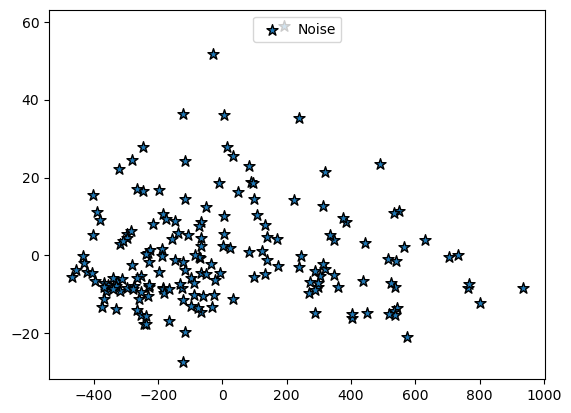

In [25]:
from sklearn.decomposition import PCA

# 2Ï∞®ÏõêÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ PCA n_componets=2Î°ú ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î≥ÄÌôò
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(wine.data)

# visualize_cluster_2d( ) Ìï®ÏàòÎäî ftr1, ftr2 Ïª¨ÎüºÏùÑ Ï¢åÌëúÏóê ÌëúÌòÑÌïòÎØÄÎ°ú PCA Î≥ÄÌôòÍ∞íÏùÑ Ìï¥Îãπ Ïª¨ÎüºÏúºÎ°ú ÏÉùÏÑ±
wineDF['ftr1'] = pca_transformed[:,0]
wineDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, wineDF, 'dbscan_cluster', iscenter=False)

## **4-2. DBSCANÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Î≥ÄÍ≤ΩÌïòÏó¨ Íµ∞ÏßëÌôîÎ•º ÏàòÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.**
- ÏïÑÎûò ÏΩîÎìúÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.

target  dbscan_cluster
0       -1                59
1       -1                71
2       -1                48
Name: count, dtype: int64


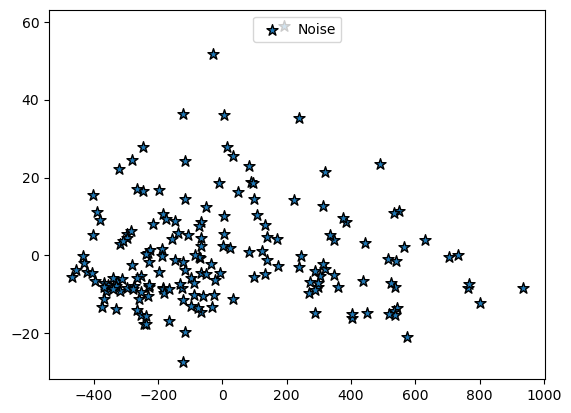

In [26]:
from sklearn.cluster import DBSCAN

# ÏûÖÏã§Î°†ÏùÑ 0.8, ÏµúÏÜå Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º 7Î°ú ÏÑ§Ï†ïÌïú ÌõÑ DBSCAN Ìï®ÏàòÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.
dbscan = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)

wineDF['dbscan_cluster'] = dbscan_labels
wineDF['target'] = wine.target

wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)

visualize_cluster_plot(dbscan, wineDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0       -1                59
1       -1                71
2       -1                48
Name: count, dtype: int64


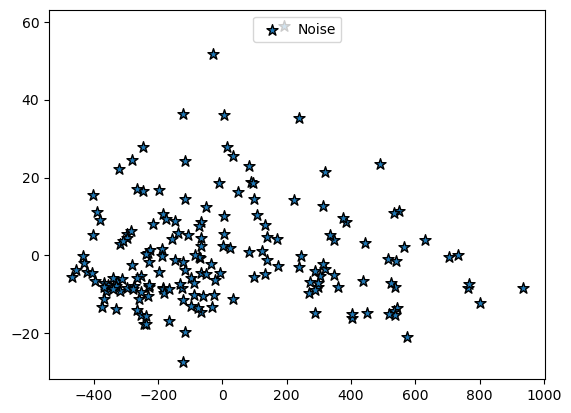

In [27]:
# ÏûÖÏã§Î°†ÏùÑ 0.7, ÏµúÏÜå Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º 16ÏúºÎ°ú ÏÑ§Ï†ïÌïú ÌõÑ DBSCAN Ìï®ÏàòÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.
dbscan = DBSCAN(eps=0.7, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)

wineDF['dbscan_cluster'] = dbscan_labels
wineDF['target'] = wine.target

wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)

visualize_cluster_plot(dbscan, wineDF, 'dbscan_cluster', iscenter=False)

## **4-3.DBSCANÏùÄ Îã§Î•∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ÏôÄ Îã¨Î¶¨ Î∞ÄÎèÑ Í∏∞Î∞ò Íµ∞ÏßëÌôî Î∞©Î≤ïÏù¥ÎùºÍ≥† ÌïúÎã§. Ïù¥Îü¨Ìïú Î∞ÄÎèÑ Í∏∞Î∞òÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ Ïñ¥Îñ§ Î∞©ÏãùÏùÑ ÏùòÎØ∏ÌïòÎäîÏßÄ Ïì∞ÏãúÏò§.**

Îãµ: DBSCANÏùÄ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò Î∞ÄÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÌòïÏÑ±ÌïòÎäîÎç∞, ÌäπÏ†ï Î∞òÍ≤Ω ÎÇ¥Ïóê ÏµúÏÜå Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ ÏàòÎ•º Ï∂©Ï°±ÌïòÎäî Ìè¨Ïù∏Ìä∏Î•º Ï§ëÏã¨ÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÌôïÏû•ÌïòÍ≥†, Î∞ÄÎèÑÍ∞Ä ÎÇÆÏùÄ ÏòÅÏó≠ÏùÄ ÎÖ∏Ïù¥Ï¶àÎ°ú Í∞ÑÏ£ºÌïúÎã§. 

# **5. Íµ∞ÏßëÌôî Ïã§Ïäµ - Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌÖåÏù¥ÏÖò**

## **5-1. RFM Í∏∞Î≤ïÏóêÏÑú Í∞Å ÏöîÏÜåÏùò ÏùòÎØ∏Î•º ÏÑúÏà†ÌïòÏÑ∏Ïöî.**


Îãµ:
- **R** :  Í≥†Í∞ùÏù¥ ÎßàÏßÄÎßâÏúºÎ°ú Íµ¨Îß§Ìïú ÏãúÏ†êÏúºÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÌïú ÏãúÍ∞Ñ
- **F** :  ÏùºÏ†ï Í∏∞Í∞Ñ ÎèôÏïà Í≥†Í∞ùÏù¥ Íµ¨Îß§Ìïú ÌöüÏàò
- **M** :  ÏùºÏ†ï Í∏∞Í∞Ñ ÎèôÏïà Í≥†Í∞ùÏù¥ ÏßÄÏ∂úÌïú Ï¥ù Í∏àÏï°

## **5-2. RFM Í∏∞Î≤ïÏùÑ ÌôúÏö©ÌïòÏó¨ Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌÖåÏù¥ÏÖòÏùÑ ÏàòÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. ÏïÑÎûò ÏïàÎÇ¥Ïóê Îî∞Îùº ÏàòÌñâÌïòÎ©∞, ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.**

‚¨áÔ∏è Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ïó¨Í∏∞ÏÑú Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.‚¨áÔ∏è

https://archive.ics.uci.edu/dataset/352/online+retail

üìå ÌååÏùº Í≤ΩÎ°úÏôÄ Í¥ÄÎ†®Îêú ÏΩîÎìúÏùò Í≤ΩÏö∞ Í∞ÅÏûêÏóêÍ≤å ÎßûÍ≤å ÏÑ§Ï†ïÌï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§.

In [29]:
# ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('Online Retail.xlsx')

In [30]:
# ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df = retail_df[retail_df['Country']=='United Kingdom']

In [31]:
# ÎπàÏπ∏ÏùÑ ÏôÑÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df = cust_df.rename(columns = {'InvoiceDate': 'LastPurchaseDate',
                                    'InvoiceNo': 'Frequency',
                                    'sale_amount': 'Monetary'
                                    }
                        )
cust_df = cust_df.reset_index()

import datetime as dt
cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['LastPurchaseDate']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_of Î°úÏö∞ÏôÄ ÏπºÎüº Í±¥ÏàòÎäî ', cust_df.shape)
cust_df.head(3)

cust_of Î°úÏö∞ÏôÄ ÏπºÎüº Í±¥ÏàòÎäî  (3920, 5)


CustomerID    LastPurchaseDate  Frequency  Monetary  Recency
0       12346 2011-01-18 10:01:00          1  77183.60      326
1       12747 2011-12-07 14:34:00        103   4196.01        3
2       12748 2011-12-09 12:20:00       4595  33719.73        1